# 2B

In [9]:

def hamming_distance(text1, text2):
    d = 0
    for i in range(len(text1)):
        if not(text1[i] == text2[i]):
            d += 1
    return d

def distance_pattern_text(kmer, dna):
    n = len(dna)
    k = len(kmer)

    mn = 10000000000000
    for i in range(n-k+1):
        sub = dna[i:i+k]
        hd = hamming_distance(sub, kmer)
        mn = min(mn, hd)
    return mn

def median_string(k, dnas, kmers):
    dic = {}
    for kmer in kmers:
        d = 0
        for dna in dnas:
            min_d = distance_pattern_text(kmer, dna)
            d += min_d
        dic[kmer] = d

    mn = min(dic.values())
    for k in dic:
        if dic[k] == mn:
            return k

def create(s, k, kmers):
    if len(s) == k:
        kmers.append(s)
        return
    create(s+'A', k, kmers)
    create(s+'C', k, kmers)
    create(s+'G', k, kmers)
    create(s+'T', k, kmers)

if __name__ == "__main__":
    with open("rosalind_ba2b.txt") as file:
        f = file.read().strip().split("\n")
        k = int(f[0])
        dnas = f[1:]

    kmers = []
    create('', k, kmers)
    median = median_string(k, dnas, kmers)
    print(median)

AAAGTT


# 2C

In [21]:

def best_kmer(text, k, profile):
    dic = {
        'A': profile[0],
        'C': profile[1],
        'G': profile[2],
        'T': profile[3]
    }

    best = {}
    n = len(text)
    for i in range(n-k+1):
        sub = text[i:i+k]
        score = 1.0
        for i, ch in enumerate(sub):
            score *= dic[ch][i]
        best[sub] = score

    mx = max(best.values())
    for k in best:
        if best[k] == mx:
            return k

if __name__ == "__main__":
    with open('rosalind_ba2c.txt') as file:
        f = file.read().strip().split("\n")
        text = f[0]
        k = int(f[1])
        other = f[2:]

        profile = []
        for item in other:
            tmp = item.split()
            arr = [float(n) for n in tmp]
            profile.append(arr)
        best_k = best_kmer(text, k, profile)
        print(best_k)



AGAGGC


# 2F

In [39]:

import math
import random

def create_profile(motifs, k):
    matrix = {
        'A': [0]*k,
        'C': [0]*k,
        'G': [0]*k,
        'T': [0]*k
    }

    for motif in motifs:
        for i, ch in enumerate(motif):
            matrix[ch][i] += 1
    return matrix

def get_profile_most_probable_kemr(profile, dna, k, t):
    frequency_matrix = profile.copy()

    for key in frequency_matrix:
        frequency_matrix[key] = [(val+1)/(t+4) for val in frequency_matrix[key]]

    n = len(dna)
    kmer_list = []
    max_score = -1.0

    for i in range(n-k+1):
        score = 1.0
        kmer = dna[i:i+k]

        for j, ch in enumerate(kmer):
            score *= frequency_matrix[ch][j]

        max_score = max(max_score, score)
        kmer_list.append((kmer, score))

    for kmer in kmer_list:
        if max_score == kmer[1]:
            return kmer[0]

def consensus_string(motifs):
    k = len(motifs[0])
    c_s = ""

    for i in range(k):
        dic = {
            'A': 0,
            'C': 0,
            'G': 0,
            'T': 0
        }

        for motif in motifs:
            ch = motif[i]
            dic[ch] += 1

        mx = max(dic.values())
        for key in dic:
            if mx == dic[key]:
                c_s += key
                break
    return c_s

def hamming_distance(text1, text2):
    d = 0
    for i in range(len(text1)):
        if not(text1[i] == text2[i]):
            d += 1
    return d

def score(motifs, consensus):
    total_score = 0
    for motif in motifs:
        total_score += hamming_distance(motif, consensus)
    return total_score

def randomized_motif_search_with_pseudocount(dnas, k, t):
    best_score = math.inf
    n = len(dnas[0])
    motifs = []

    for dna in dnas:
        idx = random.randint(0, n-k)
        motifs.append(dna[idx:idx+k])
    best_motifs = motifs.copy()

    while True:
        profile = create_profile(motifs, k)
        motifs.clear()

        for j in range(len(dnas)):
            profile_most_probable_kmer = get_profile_most_probable_kemr(profile, dnas[j], k, t)
            motifs.append(profile_most_probable_kmer)

        consensus = consensus_string(motifs)
        score_motif = score(motifs, consensus)
        if score_motif < best_score:
            best_score = score_motif
            best_motifs = motifs
        else:
            return best_motifs, best_score

if __name__ == "__main__":
    k, t = 8, 5
    dnas = [
        "CGCCCCTCTCGGGGGTGTTCAGTAAACGGCCA",
        "GGGCGAGGTATGTGTAAGTGCCAAGGTGCCAG",
        "TAGTACCGAGACCGAAAGAAGTATACAGGCGT",
        "TAGATCAAGTTTCAGGTGCACGTCGGTGAACC",
        "AATCCACCAGCTCCACGTGCAATGTTGGCCTA"
    ]

    best_motifs, best_score = randomized_motif_search_with_pseudocount(dnas, k, t)
    for i in range(1, 1000):
        motif, _score = randomized_motif_search_with_pseudocount(dnas, k, t)
        if _score < best_score:
            best_motifs = motif
            best_score = _score 

    for motif in best_motifs:
        print(motif)

TCTCGGGG
TGTAAGTG
TACAGGCG
TTCAGGTG
TCCACGTG


# 2H

In [30]:
def hamming_distance(text1, text2):
    d = 0
    for i in range(len(text1)):
        if not(text1[i] == text2[i]):
            d += 1
    return d

def distance(pattern, dnas):
    k = len(pattern)
    distance = 0

    for text in dnas:
        min_hd = 1000000000
        n = len(text)
        for i in range(n-k+1):
            sub = text[i:i+k]
            d = hamming_distance(pattern, sub)
            if min_hd > d:
                min_hd = d
        distance += min_hd
    return distance

if __name__ == "__main__":
    with open("test.txt") as file:
        f = file.read().strip().split("\n")
        pattern = f[0]
        dnas = f[1].split()

        d = distance(pattern, dnas)
        print(d)

5


# 3E

In [35]:

def debruijn_graph(kmers):
    dic = {}
    for kmer in kmers:
        pre = kmer[:-1]
        suf = kmer[1:]

        if pre not in dic.keys():
            dic[pre] = [suf]
        else:
            dic[pre].append(suf)
    return dic

if __name__ == "__main__":
    with open("test.txt") as file:
        f = file.read().strip().split("\n")
        graph = debruijn_graph(f)
        for k in graph:
            print(k + " -> " + ",".join(graph[k]) )

GAG -> AGG
CAG -> AGG,AGG
GGG -> GGG,GGA
AGG -> GGG
GGA -> GAG


# 3G

In [41]:
def euler_path(start, graph):
    def visit(node):
        while graph[node]:
            neighbor = graph[node].pop()
            visit(neighbor)
        cycle.append(node)
    cycle = []
    visit(start)
    return cycle[::-1]

if __name__ == "__main__":
    graph = {}
    with open('test.txt') as file:
        f = file.read().strip().split("\n")
        for item in f:
            line = item.split(" -> ")
            node = line[0]
            edges = line[1].split(",")
            graph[node] = edges

    all_nodes = set()
    for node in graph:
        all_nodes.add(node)
        for n in graph[node]:
            all_nodes.add(n)
    all_nodes = sorted(list(all_nodes))

    in_degree = {}
    out_degree = {}
    for node in all_nodes:
        in_degree[node] = 0
        out_degree[node] = 0
    
    for node in graph:
        out_degree[node] = len(graph[node])

    for k in graph:
        for n in graph[k]:
            in_degree[n] += 1

    start = list(graph.keys())[0]
    cycle = True
    for k in in_degree.keys():
        if out_degree[k] - in_degree[k] == 1:
            print(k, "hi")
            start = k
        if in_degree[k] - out_degree[k] == 1:
            end = k

        if out_degree[k] == 0:
            cycle = False

    if not cycle:
        graph[end] = [start]

    path = euler_path(start, graph)
    if not cycle:
        path = path[:-1]
    print("->".join(path))

end


# 4B

In [11]:
from Bio.Seq import Seq

def reverse_complement(text):
    dic = {
        'A': 'T',
        'C': 'G',
        'G': 'C',
        'T': 'A'
    }

    new = ""
    for ch in text:
        new += dic[ch]
    return new[::-1]

if __name__ == "__main__":
    text = "ATGGCCATGGCCCCCAGAACTGAGATCAATAGTACCCGTATTAACGGGTGA"
    amino_acid = "MA"
    n = len(text)
    m = len(amino_acid)
    k = 3*m

    for i in range(n-k+1):
        sub = text[i:i+k]
        rev_sub = reverse_complement(sub)

        if Seq(amino_acid) == Seq(sub).translate() or Seq(amino_acid) == Seq(rev_sub).translate():
            print(sub)

ATGGCC
GGCCAT
ATGGCC


# 4C

In [45]:
MASS = {
    'G': 57,
    'A': 71,
    'S': 87,
    'P': 97,
    'V': 99,
    'T': 101,
    'C': 103,
    'I': 113,
    'N': 114,
    'D': 115,
    'K': 128,
    'Q': 128,
    'E': 129,
    'M': 131,
    'H': 137,
    'F': 147,
    'R': 156,
    'Y': 163,
    'W': 186,
    'L': 113,
}

def cyclospectrum(peptide):
    n = len(peptide)
    spec = ["", peptide]
    peptide += peptide
    m = len(peptide)

    for i in range(n):
        sub = ""
        for j in range(n-1):
            sub += peptide[i+j]
            spec.append(sub)
    
    ans = []
    for p in spec:
        w = 0
        for ch in p:
            w += MASS[ch]
        ans.append(w)
    return sorted(ans)

if __name__ == "__main__":
    with open('test.txt') as file:
        peptide = file.read().strip()
        ans = cyclospectrum(peptide)
        for n in ans:
            print(n, end=" ")

0 113 114 128 129 227 242 242 257 355 356 370 371 484 

# 4D

14712706211


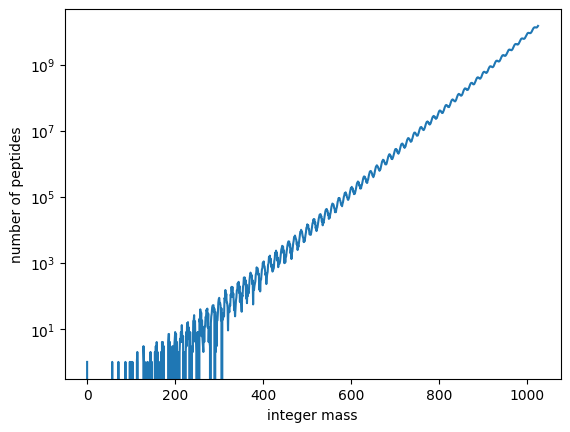

In [57]:
import matplotlib.pyplot as plt

MASS = {
    'G': 57,
    'A': 71,
    'S': 87,
    'P': 97,
    'V': 99,
    'T': 101,
    'C': 103,
    'I': 113,
    'N': 114,
    'D': 115,
    'K': 128,
    'Q': 128,
    'E': 129,
    'M': 131,
    'H': 137,
    'F': 147,
    'R': 156,
    'Y': 163,
    'W': 186,
    'L': 113,
}


def count_peptide(target):
    target += 1
    dp = [0]*target
    dp[0] = 1

    masses = sorted(list(set(MASS.values())))
    n = len(masses)

    for small_target in range(target):
        for j in range(n):
            if small_target >= masses[j]:
                dp[small_target] += dp[small_target - masses[j]]
    return dp, dp[-1]

if __name__ == "__main__":
    target = 1024
    dp, total = count_peptide(target)
    print(total)

    plt.yscale('log')
    plt.xlabel('integer mass')
    plt.ylabel('number of peptides')
    plt.plot(dp)
    plt.show()

# 4E

In [ ]:
MASS = {
    'G': 57,
    'A': 71,
    'S': 87,
    'P': 97,
    'V': 99,
    'T': 101,
    'C': 103,
    'I': 113,
    'N': 114,
    'D': 115,
    'K': 128,
    'Q': 128,
    'E': 129,
    'M': 131,
    'H': 137,
    'F': 147,
    'R': 156,
    'Y': 163,
    'W': 186,
    'L': 113,
}

def expand(peptides):
    masses = list(MASS.keys())
    new_peptides = []
    for peptide in peptides:
        for mass in masses:
            p = peptide + mass
            new_peptides.append(p)
    return new_peptides

def mass(peptide):
    m = 0
    for ch in peptide:
        m += MASS[ch]
    return m

def ParentMass(spectrum):
    return sorted(spectrum)[-1]

def cyclospectrum(peptide):
    n = len(peptide)
    kmers = [peptide, ""]
    peptide += peptide
    m = len(peptide)
    for i in range(n):
        sub = ""
        for j in range(n-1):
            sub += peptide[i+j]
            kmers.append(sub)
    
    l_spectrum = []
    for kmer in kmers:
        score = 0
        for ch in kmer:
            score += MASS[ch]
        l_spectrum.append(score)
    return sorted(l_spectrum)

def linear_spectrum(peptide):
    all = []
    n = len(peptide)
    for i in range(n):
        sub = ""
        for j in range(i, n):
            sub += peptide[j]
            all.append(sub)

    l_spec = []
    for p in all:
        w = 0
        for ch in p:
            w += MASS[ch]
        l_spec.append(w)
    return l_spec

def consistent(peptide, spectrum):
    if mass(peptide) > ParentMass(spectrum) - MASS['G']:
        return False
    
    l_spectrum = linear_spectrum(peptide)
    for val in l_spectrum:
        if val not in spectrum:
            return False
    return True

def cyclopeptide_sequencing(spectrum):
    peptides = ['']
    cnt = 0
    candidates = set()
    while peptides:
        peptides = expand(peptides)

        for peptide in peptides:
            if mass(peptide) == ParentMass(spectrum):
                if cyclospectrum(peptide) == spectrum:
                    p = []
                    for ch in peptide:
                        p.append(str(MASS[ch]))
                    candidates.add("-".join(p))
                else:
                    peptides = [p for p in peptides if not(p == peptide)]
            elif not consistent(peptide, spectrum):
                peptides = [p for p in peptides if not(p == peptide)]
    return candidates

if __name__ == "__main__":
    ex_spectrum = [0, 113, 128, 186, 241, 299, 314, 427]
    with open('test.txt') as file:
        f = file.read().strip().split()
        ex_spectrum = [int(n) for n in f]
        
    candidates = cyclopeptide_sequencing(ex_spectrum)
    for c in candidates:
        print(c, end=" ")

# 4F

In [67]:
MASS = {
    'G': 57,
    'A': 71,
    'S': 87,
    'P': 97,
    'V': 99,
    'T': 101,
    'C': 103,
    'I': 113,
    'N': 114,
    'D': 115,
    'K': 128,
    'Q': 128,
    'E': 129,
    'M': 131,
    'H': 137,
    'F': 147,
    'R': 156,
    'Y': 163,
    'W': 186,
    'L': 113,
}

def cyclospectrum(peptide):
    n = len(peptide)
    spec = ["", peptide]
    peptide += peptide
    m = len(peptide)

    for i in range(n):
        sub = ""
        for j in range(n-1):
            sub += peptide[i+j]
            spec.append(sub)
    
    ans = []
    for p in spec:
        w = 0
        for ch in p:
            w += MASS[ch]
        ans.append(w)
    return sorted(ans)

def score(peptide, spectrum):
    cyc_spec = cyclospectrum(peptide)
    dic_cyc = {}
    dic_spec = {}

    for p in spectrum:
        if p not in dic_spec:
            dic_spec[p] = 1
        else:
            dic_spec[p] += 1

    for p in cyc_spec:
        if p not in dic_cyc:
            dic_cyc[p] = 1
        else:
            dic_cyc[p] += 1

    s = 0
    for k in dic_cyc:
        if k in dic_spec.keys():
            s += min(dic_cyc[k], dic_spec[k])
    return s

if __name__ == "__main__":
    with open('test.txt') as file:
        f = file.read().strip().split("\n")
        peptide = f[0]
        other = f[1].split()
        spectrum = [int(n) for n in other]

        s = score(peptide, spectrum)
        print(s)

11


# 4H

In [75]:
def convolution(spec):
    n = len(spec)
    dic = {}

    for i in range(n):
        for j in range(n):
            if i == j:
                break
            d = abs(spec[i] - spec[j])
            if d not in dic.keys():
                dic[d] = 1
            else:
                dic[d] += 1

    tuple_list = []
    for k in dic:
        tuple_list.append((dic[k], k))

    tuple_list = sorted(tuple_list, reverse=True)
    ans = []
    for t in tuple_list:
        cnt = t[0]
        val = t[1]
        for i in range(cnt):
            ans.append(val)
    return ans

if __name__ == "__main__":
    with open("test.txt") as file:
        f = file.read().strip().split()
        spec = [int(ch) for ch in f]
        ans = convolution(spec)
        for n in ans:
            print(n, end=" ")

186 186 137 137 323 49 